In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
spotify = pd.read_csv("/content/drive/MyDrive/Projects/spotify_top_charts_22.csv")
spotify.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


#Preprocessing
1.   Remove Uri and track_name as they are redundant
2.   Changing the name of the artist to numerical value, as artist may affect the rating too
3.   Splitting the peak rating into 2 bands, less than 50 and otherwise
4.   Splitting the Data

In [3]:
spotify = pd.read_csv("/content/drive/MyDrive/Projects/spotify_top_charts_22.csv")
spotify.head()
#Uri does not affect the peak ranking
spotify = spotify.drop(["uri", "track_name"], axis = 1)
artist_label = LabelEncoder()
#spotify["artist_names"] = artist_label.fit_transform(spotify["artist_names"])
X = spotify.drop("peak_rank", axis = 1)
new = spotify['peak_rank']
def myfunc(x):
  if x <= 20:
    return 1
  return 0
y = list(map(myfunc, new))



Changing the Artist name to numerical value

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = lambda x: x.split(', ')
vect = CountVectorizer(tokenizer = tokenizer)
count_matrix = vect.fit_transform(spotify["artist_names"])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
 artist_names = vect.get_feature_names_out()

In [6]:
count_array = count_matrix.toarray()
artist_pd = pd.DataFrame(count_array, columns = artist_names)
clean = pd.concat([spotify,artist_pd], axis = 1)

In [7]:
clean = clean.drop(["artist_names"], axis = 1)

In [8]:
X = clean.drop("peak_rank", axis = 1)
helper = clean['peak_rank']
def myfunc(x):
  if x <= 20:
    return 1
  return 0
y = list(map(myfunc, new))

     weeks_on_chart  danceability  energy  key  loudness  mode  speechiness  \
0                65         0.761   0.525   11    -6.900     1       0.0944   
1                37         0.591   0.764    1    -5.484     1       0.0483   
2                 3         0.812   0.736    4    -5.421     0       0.0833   
3                21         0.728   0.783   11    -4.424     0       0.2660   
4                19         0.695   0.540    4    -5.692     1       0.0493   
..              ...           ...     ...  ...       ...   ...          ...   
641               5         0.725   0.446    4    -8.958     0       0.0287   
642               1         0.578   0.431    2    -7.034     1       0.0269   
643               1         0.872   0.422    1    -7.415     0       0.3630   
644               1         0.730   0.785    9    -7.986     0       0.2430   
645               1         0.476   0.189   11   -13.777     0       0.0329   

     acousticness  instrumentalness  liveness  ... 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(sum(y_test))
print(len(X_train))

61
452


#Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes = (14,14,14,14,14,14,14,14,14,14,14,14), max_iter = 1000)
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                                  14),
              max_iter=1000)

In [23]:
prediction = mlpc.predict(X_test)
cm = accuracy_score(y_test, prediction)
print(cm)

0.6443298969072165


              precision    recall  f1-score   support

           0       0.75      0.74      0.75       133
           1       0.45      0.48      0.46        61

    accuracy                           0.65       194
   macro avg       0.60      0.61      0.60       194
weighted avg       0.66      0.65      0.66       194

tn: 98
fp: 29
fn: 32
tp: 29


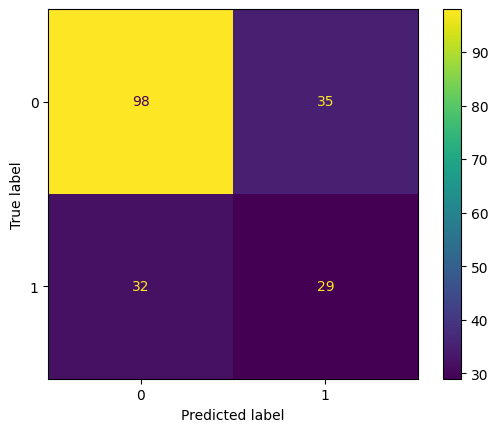

In [13]:
print(classification_report(y_test, prediction))
cm = confusion_matrix(y_test,prediction)
tn, fp, fn, tp = cm.ravel()
print("tn: %d" % tn)
print("fp: %d" % tp)
print("fn: %d" % fn)
print("tp: %d" % tp)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = mlpc.classes_)
disp.plot()
plt.show()

# Random Tree

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [15]:
acc_rfc = accuracy_score(y_test, pred_rfc)
acc_rfc

0.7371134020618557

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       133
           1       0.71      0.28      0.40        61

    accuracy                           0.74       194
   macro avg       0.72      0.61      0.62       194
weighted avg       0.73      0.74      0.70       194

tn: 126
fp: 17
fn: 44
tp: 17


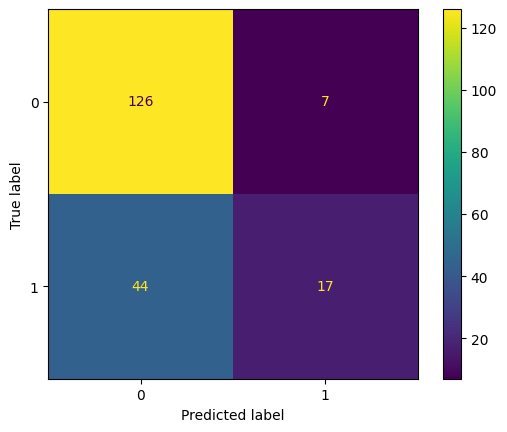

In [16]:
print(classification_report(y_test, pred_rfc))
cm = confusion_matrix(y_test,pred_rfc)
tn, fp, fn, tp = cm.ravel()
print("tn: %d" % tn)
print("fp: %d" % tp)
print("fn: %d" % fn)
print("tp: %d" % tp)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()
plt.show()

#K-Neighbour

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [18]:
acc_knn = accuracy_score(y_test, pred_knn)
acc_knn

0.4948453608247423

#Support Vector Machine

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [20]:
acc_clf = accuracy_score(y_test, pred_clf)
acc_clf

0.7164948453608248

              precision    recall  f1-score   support

           0       0.73      0.92      0.82       133
           1       0.62      0.26      0.37        61

    accuracy                           0.72       194
   macro avg       0.67      0.59      0.59       194
weighted avg       0.70      0.72      0.68       194

tn: 123
fp: 16
fn: 45
tp: 16


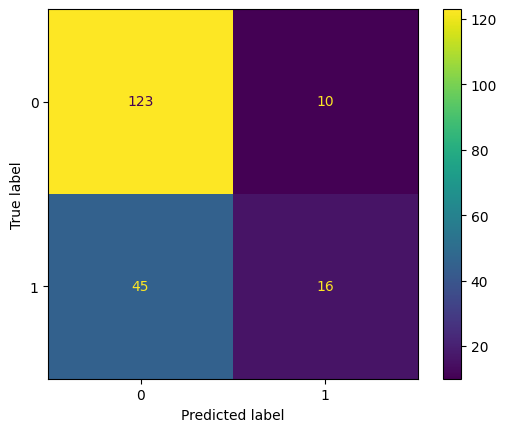

In [21]:
print(classification_report(y_test, pred_clf))
cm = confusion_matrix(y_test,pred_clf)
tn, fp, fn, tp = cm.ravel()
print("tn: %d" % tn)
print("fp: %d" % tp)
print("fn: %d" % fn)
print("tp: %d" % tp)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()